<a href="https://colab.research.google.com/github/JeswinJestin/BangloreHousePricePrediction/blob/main/DS_ML_1_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Scinece and ML PROJECT**

# Bengaluru House Price Prediction

This project aims to build a machine learning model to predict house prices in Bengaluru, India, using a dataset containing various property features. The project follows a typical data science pipeline, including data loading, cleaning, feature engineering, dimensionality reduction, outlier handling, and visualization, to prepare the data for model training.

## Project Steps:

1.  **Data Loading and Initial Exploration:**
    *   Load the house price dataset into a pandas DataFrame.
    *   Perform initial checks to understand the dataset's structure, dimensions, and data types.

2.  **Data Cleaning:**
    *   Handle missing values by dropping rows with null entries (justified by the large dataset size).
    *   Address inconsistencies in the 'size' column by extracting the numerical BHK count.
    *   Standardize the 'total\_sqft' column by converting range values to their average and identifying non-standard entries.

3.  **Feature Engineering:**
    *   Create a new feature, 'price\_per\_sqft', which is a key metric in real estate analysis and aids in outlier identification.

4.  **Dimensionality Reduction:**
    *   Reduce the number of unique location categories by grouping locations with a low number of occurrences into an 'other' category to manage the high cardinality of the 'location' feature.

5.  **Outlier Detection and Removal:**
    *   Identify and remove outliers based on domain knowledge (e.g., minimum square feet per BHK) and statistical methods (e.g., using standard deviation of 'price\_per\_sqft' per location).

6.  **Data Visualization:**
    *   Visualize the data using plots like scatter charts to explore relationships between features (e.g., total square feet, price, BHK) and identify patterns or potential outliers.

## Dataset:

The dataset used for this project is the "Bengaluru House Data.csv", which contains information about properties in Bengaluru, including:

*   `area_type`: Type of area (e.g., Super built-up Area, Built-up Area)
*   `availability`: Availability status
*   `location`: Location of the property
*   `size`: Size of the property in BHK or Bedrooms
*   `society`: Society name
*   `total_sqft`: Total square footage of the property
*   `bath`: Number of bathrooms
*   `balcony`: Number of balconies
*   `price`: Price of the property (in Lakhs)

## Technologies Used:

*   Python
*   Pandas
*   NumPy
*   Matplotlib

## Getting Started:

1.  Clone the repository.
2.  Ensure you have the necessary libraries installed (`pandas`, `numpy`, `matplotlib`).
3.  Run the Jupyter notebook (`.ipynb` file) to follow the data processing and analysis steps.

## Future Work:

*   Implement various machine learning models (e.g., Linear Regression, Lasso, Decision Tree) for price prediction.
*   Evaluate model performance using appropriate metrics.
*   Perform hyperparameter tuning to optimize the chosen model.
*   Potentially explore additional feature engineering techniques.

Real estate price prediction project. WE ARE USING THE BENGALURU HOUSE PRICE DATA


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

* Imports the pandas library, which is essential for working with data in a tabular format (like spreadsheets or databases)

*  Imports the NumPy library, which is used for numerical operations and working with arrays

* Imports the pyplot module from the Matplotlib library, which is used for creating static, interactive, and animated visualizations in Python.

* This is a "magic command" in Jupyter notebooks (which Colab is based on). It tells Matplotlib to display plots directly within the notebook, rather than in a separate window.

* Imports the main Matplotlib library.

* sets a default figure size for Matplotlib plots. It means that any subsequent plots created will have a width of 20 inches and a height of 10 inches by default.

In [2]:
#reading the csv file, opening the csv file into a pandas Dataframe
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


* df1 = pd.read_csv("Bengaluru_House_Data.csv"): This line uses the read_csv() function from the pandas library (pd) to read the data from the file named "Bengaluru_House_Data.csv". The data is then stored in a pandas DataFrame variable named df1.

* df1.head(): This line calls the head() method on the df1 DataFrame. The head() method returns the first 5 rows of the DataFrame by default. This is a useful way to quickly inspect the structure and content of your data after loading it.

In [3]:
df1.shape

#this shows/returns the number of rows and coloumns in our dataset

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


This code snippet uses the groupby() and agg() methods from pandas to count the occurrences of each unique value in the 'area_type' column in our DataFrame df1.

df1.groupby('area_type'): This groups the DataFrame df1 based on the unique values found in the 'area_type' column. This means that rows with the same 'area_type' will be grouped together.
['area_type'].agg('count'): After grouping, this selects the 'area_type' column again for each group and applies the 'count' aggregation function. The 'count' function simply counts the number of non-null entries in the 'area_type' column for each group.

In [5]:
#now i would like to keep my model simple so lets get rid of unwanted thing that i think may not affect the price
# that may include the "area_type", "Society", etc... so

df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#now we start the data cleaning process
#This code snippet checks for missing values in each column of your DataFrame df2

df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


df2.isnull(): This part of the code returns a DataFrame of the same shape as df2, but instead of the original values, it contains True where a value is missing (NaN - Not a Number) and False where a value is present.
.sum(): This method is applied to the resulting boolean DataFrame. When sum() is used on a boolean Series or DataFrame, it treats True as 1 and False as 0. Therefore, calling sum() after isnull() effectively counts the number of True values in each column, which corresponds to the total number of missing values in that column.

The output:
location 1

size 16

total_sqft 0

bath 73

price 0

dtype: int64 tells you that:

The 'location' column has 1 missing value.

The 'size' column has 16 missing values.

The 'total_sqft' column has 0 missing values.

The 'bath' column has 73 missing values.

The 'price' column has 0 missing values.



This information is crucial for the data cleaning process, as you'll need to decide how to handle these missing values (e.g., remove rows with missing values, fill them with a specific value like the mean or median, etc.).


#### so either we can remove the missing values or calculate the median or mean or any other related values and fill up the empty values


#### since the value we have found as missing value is very small when compared to what we have in the dataset so we can remove that


#### we can basically think of it like , when the data set is small then we cant just remove it like that , so we will have to find arithemetic operations and will have to fill out the empty values



In [7]:
# since we have more than 13000 values we can neglect them here
df3 = df2.dropna() #for droping we can use dropna function
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In pandas, both drop() and dropna() are used to remove data, but they serve different purposes:

drop(): This function is used to remove specified rows or columns from a DataFrame or Series based on their labels (index or column names). You explicitly tell drop() what you want to remove by providing the labels.

dropna(): This function is used to remove rows or columns that contain missing values (NaN - Not a Number). You don't need to specify which rows or columns to remove explicitly based on labels; dropna() automatically identifies and removes the ones with missing values.
In simple terms:

####Use drop() when you know the exact rows or columns you want to remove by their names.

####Use dropna() when you want to remove rows or columns that have any missing data.

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

what you can see in above is that there are different names for same types in the sizes column, so we want to fix this

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/tmp/ipython-input-2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


Here's a breakdown:

df3['bhk'] = ...: This creates a new column named 'bhk' in the df3 DataFrame.


df3['size'].apply(...): This applies a function to each value in the 'size' column of df3.


lambda x: int(x.split(' ')[0]): This is an anonymous function (lambda function) that is applied to each element x in the 'size' column.


x.split(' '): This splits the string x (e.g., '2 BHK') by the space character, resulting in a list of strings (e.g., ['2', 'BHK']).


[0]: This selects the first element of the list, which is the numerical part of the size (e.g., '2').


int(...): This converts the selected string element to an integer

In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df3[df3.bhk>20]
#checks for bhk greater than 20

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

when we run the code and found out a house with 43 bedrooms and its squarefeet is 2400. its not possible at all . so we knew something was has eroor in there. when we run this code to find out the total squarefeet that is unique, we also found that in between there are also not a specific value but ranges are also there . so basically the data we have is not uniform so we need to  fix this.

so we need to convert the range to average value


In [14]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

try: : This starts a try block, which is used to test a block of code for errors.


float(x): Inside the try block, the code attempts to convert the input x into a floating-point number using the float() function.


except: : If the float(x) conversion fails (meaning x cannot be converted to a float), the code inside the except block is executed.


return False: If an error occurs during the conversion, the function returns False.


return True: If the float(x) conversion is successful without raising an error, the code inside the except block is skipped, and the function returns True.


In essence, this function is a simple way to determine if a value is a valid number (either an integer or a float) that can be represented as a float. This is useful for data cleaning or validation when you need to ensure that a column contains numerical data.

In [15]:
df3[df3.total_sqft.apply(is_float)]
#this condition checks all the float values that have been true when passing and called by the function.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [16]:
#so to check all the values have not been true and been an exception,
#that is the values that does not return a float value insted return values such as range of value
#so we use the negation operation ~

df3[~df3.total_sqft.apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


So as we can see in the total_sqft row there are multiple types of values, we need to bring uniformity to this.

there are range of values, some are in other units and sort of -
so there are 2 ways of approch for these

 1. if we have plenty of data values and dont need our model to be that accurate we can convert the range of values to an average value and fill up the column
 AND ignore the values that are in other unit.

 2. Other Option is that we can make our model optimized by creating options for what all happens and providing to make the model efficeinet and all the conversions possible

In [17]:
#SO HERE WE ARE CONVERTING THE RANGE OF VALUES TO A SPECIFIC VALUE

def convert_sqft_to_num(x):
  tokens = str(x).split('-') # Convert to string before splitting
  if len(tokens) == 2:
    try:
      return (float(tokens[0]) + float(tokens[1])) / 2
    except:
      return None # Handle cases where range parts are not numbers
  try:
    return float(x)
  except:
    return None

tokens = x.split('-'): It attempts to split the input x by the hyphen (-) character. This is done to check if the value is a range (like '1100 - 1145').


if len(tokens) == 2: : This condition checks if the split('-') operation resulted in a list of two elements. If it did, it means the original value was likely a range.


return(float(tokens[0]) + float(tokens[1]))/2: If the value was a range, it converts both parts of the range (before and after the hyphen) to floats, calculates their average, and returns the average.


try: : If the value was not a range (the if condition was false), the code enters a try block to handle potential errors during conversion.


return float(x): It attempts to convert the original value x directly to a float. This would work for single numerical values like '1056' or '2600'.


except: : If the direct conversion to float fails (meaning the value is not a range and also not a simple number, like '34.46Sq. Meter' or '4125Perch'), the code in the except block is executed.


return None: If the value cannot be converted to a number (either a range or a single float), the function returns None.


This function is a good approach to cleaning the total_sqft column by converting ranges to their average and identifying values that are not in a usable numerical format (which will become None).

In [18]:
print(convert_sqft_to_num('1056'))

1056.0


In [19]:
print(convert_sqft_to_num('3166-6789'))
#calculates the average value here

4977.5


In [20]:
print(convert_sqft_to_num('123Parse'))

None


So we are creating each data frame in our data processing pipeline

In [21]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [22]:
df4.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


# **FEATURE ENGINEERING AND DIMENSIONALITY REDUCTION TECHNIQUES**

We know that in real estate market price per sqft is an important matter, so here we will do some feature engineering.
This feature will help us do some outlier cleaning in the later stage

In [23]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5.location.unique())

1304

In [25]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [26]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [27]:
len(location_stats[location_stats <= 10])

1052

In [28]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

,location
location,
Kalkere,10
Sadashiva Nagar,10
BTM 1st Stage,10
Basapura,10
Gunjur Palya,10
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [29]:
len(df5.location.unique())

1293

In [30]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# **OUTLIER DETECTION AND OUTLIER REMOVAL**

In [32]:
df5.shape

(13246, 7)

In [33]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [34]:
df6.price_per_sqft.describe()

#describe method gives basic statistics of a data column

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


The selected code snippet uses the .describe() method in pandas to generate descriptive statistics for the price_per_sqft column in your DataFrame df6.


Here's what .describe() does and what the output means:


df6.price_per_sqft.describe(): This calls the describe() method on the price_per_sqft column of the df6 DataFrame.

In [35]:
#to remove extreme values or outliers, that is values beyond SD value deviated far away from value 1
def remove_pps_outliers(df):
  df_out  = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out


df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

The selected code defines a function called remove_pps_outliers and then applies it to your DataFrame df6 to remove outliers based on the price per square foot (price_per_sqft) for each location.

Here's a breakdown of the remove_pps_outliers function:

def remove_pps_outliers(df):: This defines the function that takes a DataFrame df as input.


df_out = pd.DataFrame(): Initializes an empty DataFrame called df_out which will store the data after removing outliers.


for key, subdf in df.groupby('location'):: This loop iterates through each unique location in the DataFrame.

For each location, it creates a smaller DataFrame subdf containing only the rows for that specific location. key will be the location name.


m = np.mean(subdf.price_per_sqft): Calculates the mean (average) of the price_per_sqft for the current location (subdf).


st = np.std(subdf.price_per_sqft): Calculates the standard deviation of the price_per_sqft for the current location.


reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]: This is the core of the outlier removal. It filters the subdf (data for the current location) and keeps only the rows where the price_per_sqft is within one standard deviation (st) of the mean (m).

This is a common statistical method to remove outliers that are far from the average for that group (location in this case).


df_out = pd.concat([df_out,reduced_df],ignore_index=True): It concatenates (adds) the reduced_df (the data for the current location without outliers) to the df_out DataFrame. ignore_index=True is used to reset the index of the concatenated DataFrame.


return df_out: After processing all locations, the function returns the df_out DataFrame, which now contains the data with outliers removed based on the price per square foot per location.


Finally, the code df7 = remove_pps_outliers(df6) calls this function with df6 as input and stores the resulting DataFrame (with outliers removed) in a new variable called df7.


df7.shape then displays the dimensions of the new DataFrame df7, showing how many rows were removed as outliers.


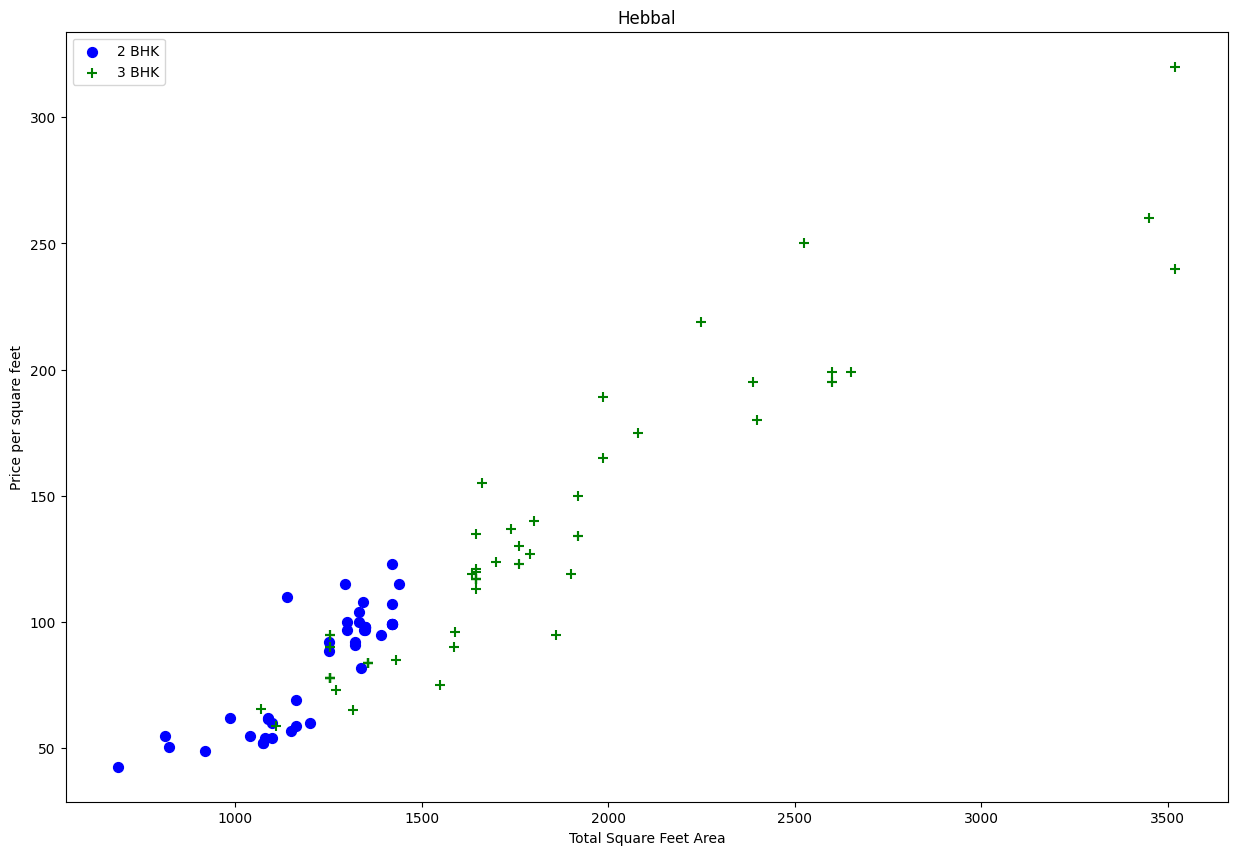

In [40]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price per square feet")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df7,"Hebbal")

The code defines a function plot_scatter_chart to visualize the relationship between total square feet and price for 2 BHK and 3 BHK properties in a specific location, and then calls this function for "Rajaji Nagar".

In [38]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')


df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

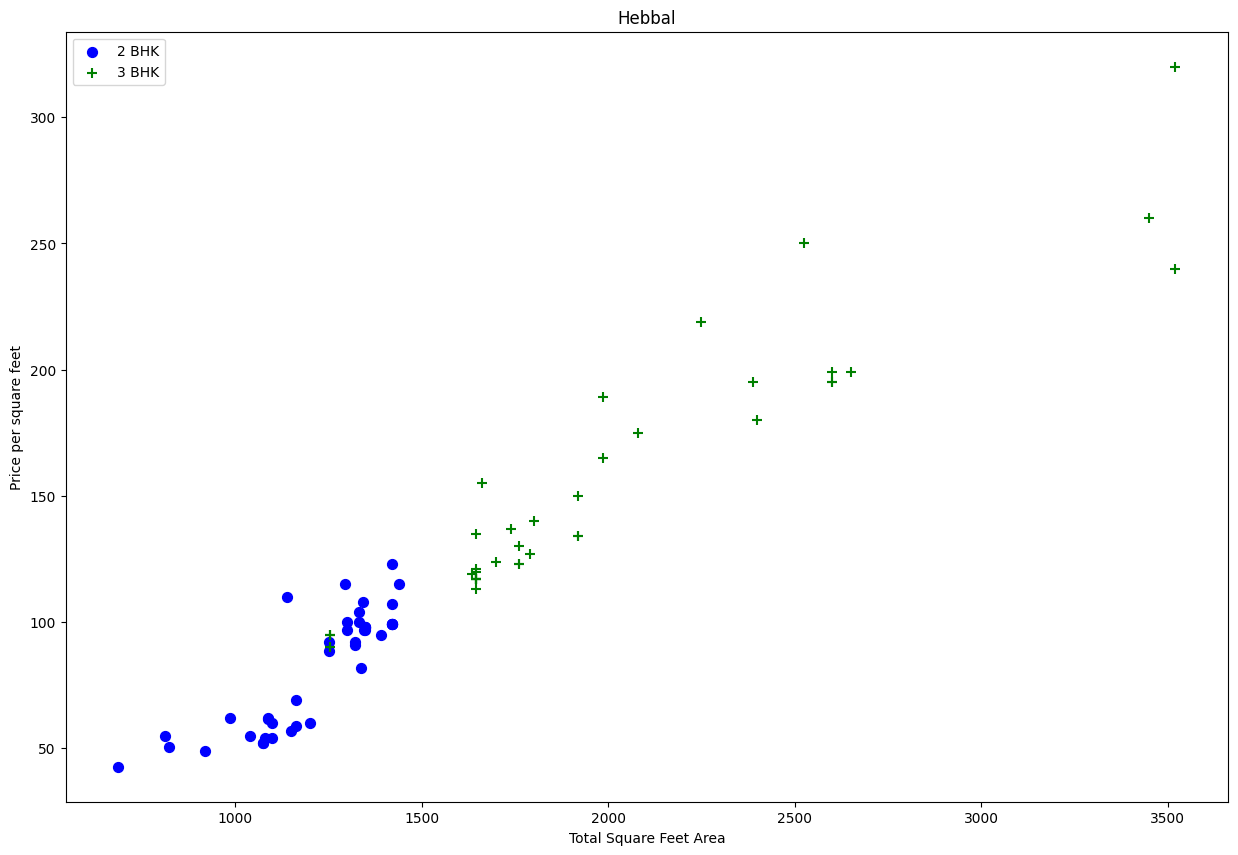

In [39]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

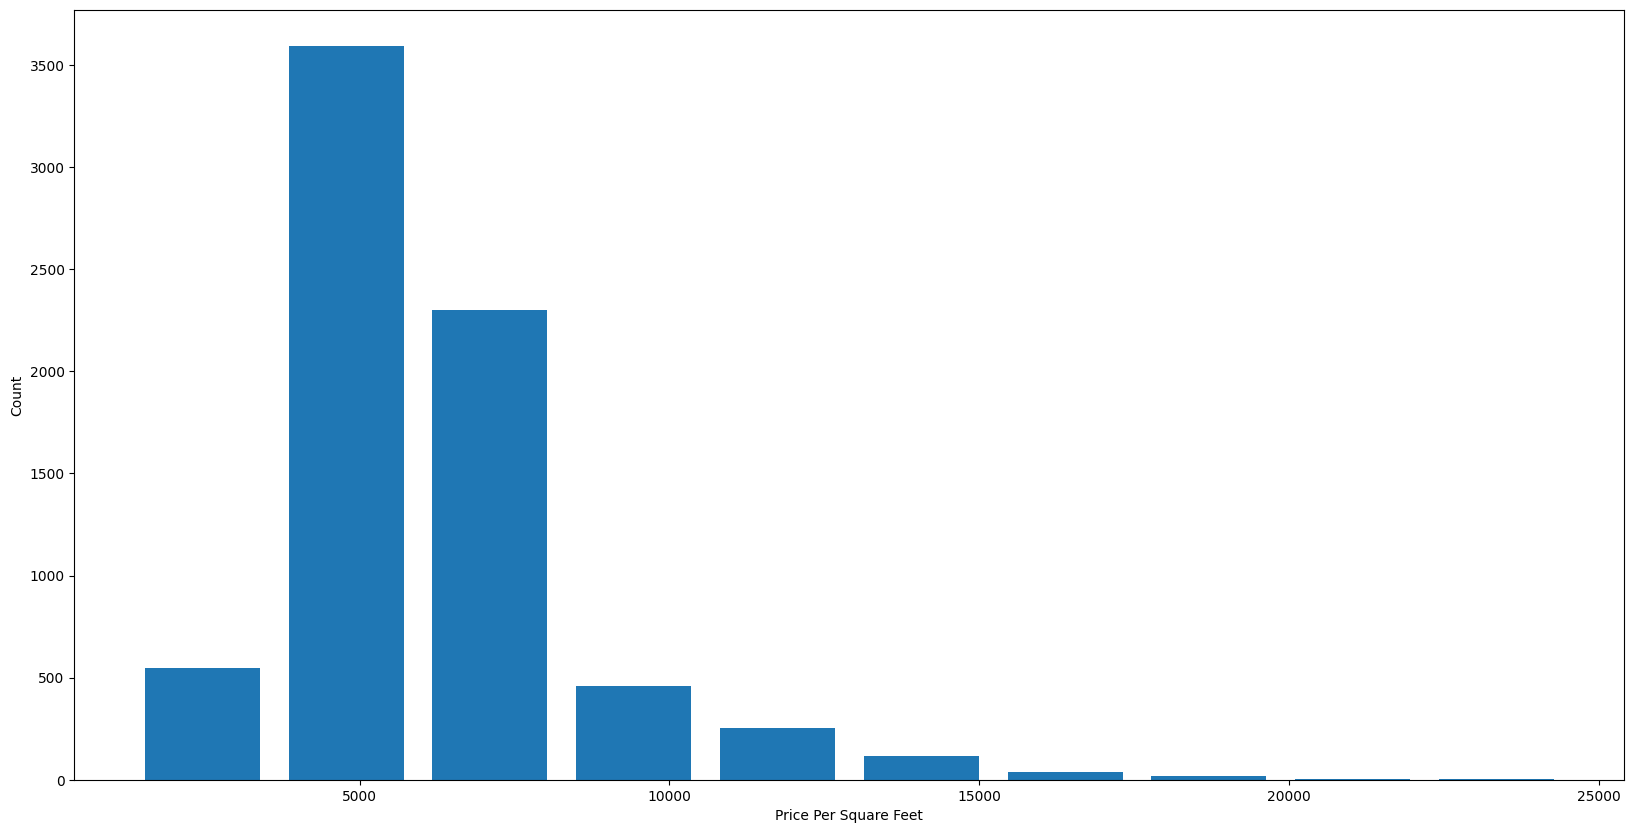

In [42]:
#plotting and histoogram
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [43]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

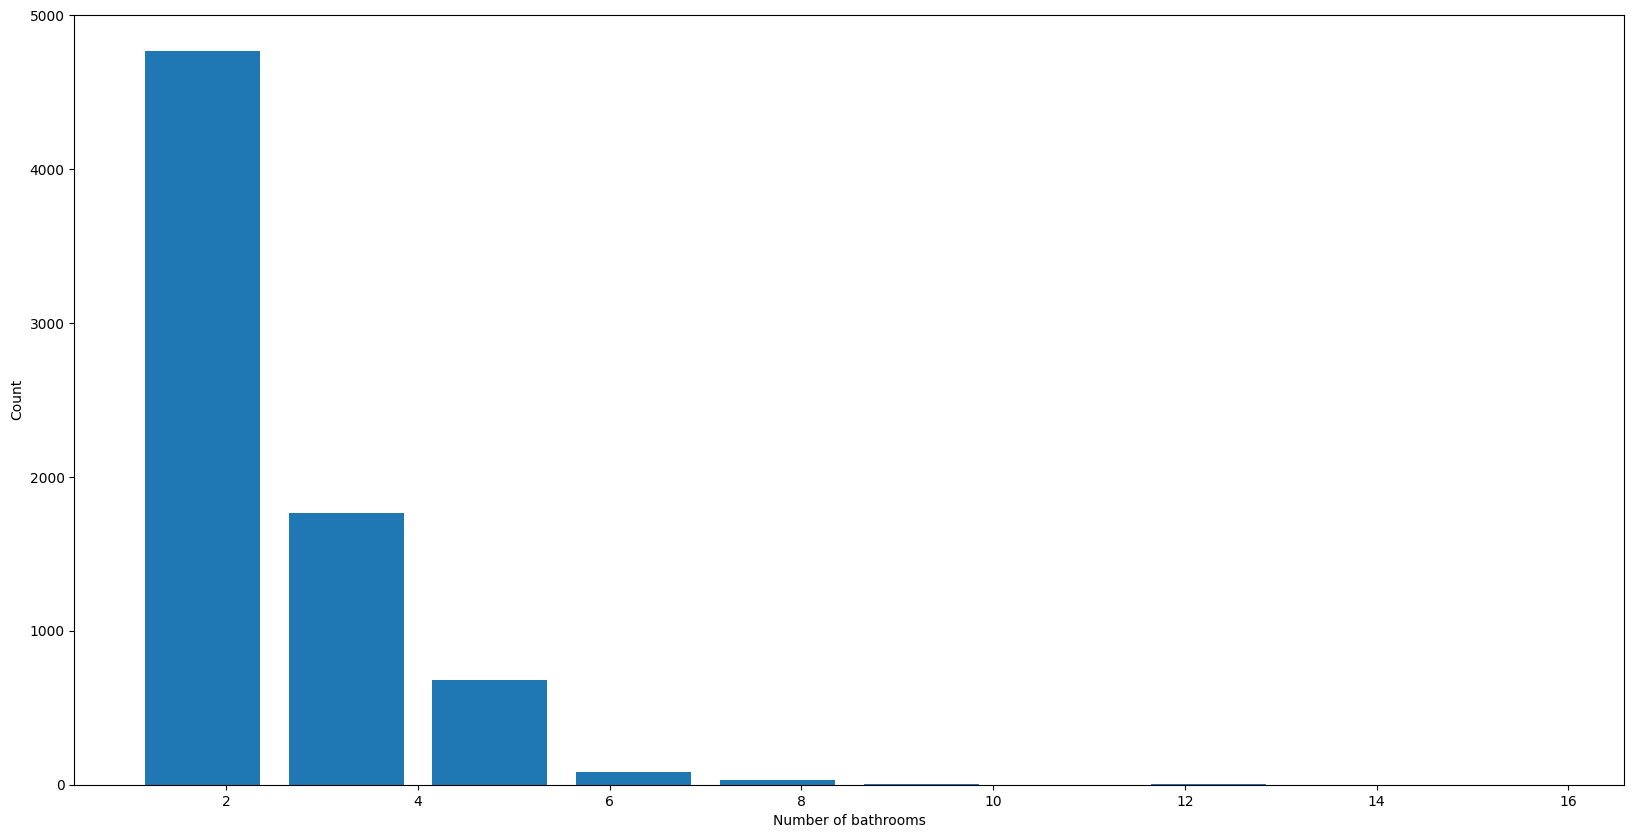

In [45]:
  plt.hist(df8.bath,rwidth=0.8)
  plt.xlabel("Number of bathrooms")
  plt.ylabel("Count")

In [46]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

so after this step our outlier detection is almost complete so we can prepare our model for machine learning training

so we can drop unnecessary features

In [48]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# **MODEL BUILDING**

MACHINE Learning model cannot interpret string data that is in the location, so we have to convert this categorical data to numerical data, using method called one - hot encoding

In [51]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


now currently we are in our df12 that is our data pipelining has become to 12th step

df1 is first stage,

df2 is second stage,
....
df12is the 12th stage

In [55]:
df12.shape

(7251, 245)

In [57]:
X = df12.drop('price',axis='columns')
X.head()
# x varibales should only contain indepemndent variables, dependent varibale is price so that needs to be dropped

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
y = df12.price
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


we always dividee our data set into training data set and test data set



In [59]:
#import train test data set

#here the test size is 0.2 that means that it is 20 % data is used for as test data set
#remaining 80% data for model training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [61]:
#creating a linear regression model, we are using the fit method and then we are evaluating the score of the training

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8452277697874329

In [62]:
# for k fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [66]:
# using a method called grid search cv
## it is used to find out the best algorithm

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#this is called as hyperparameter tuunning
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False] # Removed normalize parameter
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'], # Updated criterion
                'splitter': ['best','random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#cross validation shuflle split
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })


    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.687431,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.718949,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [69]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [70]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.49904677188148)

In [71]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(81.72616900763886)

In [72]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(181.27815484006715)

# **Model building procedure is doen after the test and validation**

# **we are going to convert it to a pickle file and connect it with python flask server**

In [73]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf,f)

In [74]:
import json
columns =  {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))

# **NEXT WE WILL USE PYTHOON FLASK SERVER AND USE THESE 2 ARTIFACTS THAT WE EXPORTED THERE.**